In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:

# a) Use the iteration method, tabulation method, and matrix method to calculate the time spent for 
# different n
# (e.g. 1, 10, 100, 1000, 10000, … uniform in the log space).
# b) For each method, output the time and n into a file
# c) Read from the file and plot log(time) (y-axis) vs.
# log(n) (x-axis) for different methods

In [2]:
%%latex 
$$fibratio(n) = \frac{F_{n}}{F_{n-1}} = \frac{F_{n-1}+F_{n-2}}{F_{n-1}}  $$
$$fibratio(n) = 1+\frac{F_{n-2}}{F_{n-1}} = 1+\frac{1}{fibratio(n-1)}  $$


<IPython.core.display.Latex object>

In [36]:
m = {1:1,2:1}
def fib_ratio_mem(n):
    if n in m: return m[n]
    else: 
         m[n] = 1+1/fib_ratio_mem(n-1)
         return m[n]

In [37]:
fib_ratio_mem(10)

1.6176470588235294

In [39]:
x = [i for i in range(2,20)]
y = [fib_ratio_mem(i) for i in range(2,20)]

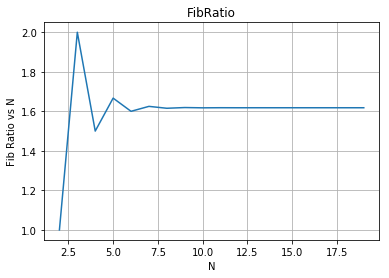

In [41]:
plt.title('FibRatio')
plt.xlabel("N")
plt.ylabel("Fib Ratio vs N")
plt.grid(True)

plt.plot(x,y)

In [3]:
# Calculate and plot Fn/Fn-1= (Fn-1 + Fn-2)/Fn-1 = 1 + (Fn-2)/(Fn-1) =
#1 + 1/fib_ratio(n-1)
#with n using memorization/memoize
# method

    
def fib_ratio_iter(n):
    if n <= 2 : return 1
    else:
        f = 1
        for i in range(3,n+1):
            f = 1+1/f
        return f
def fib_ratio_tab(n):
    fibr = [1]*(n+1)
    for i in range(3,n+1):
        fibr[i] = 1+1/fibr[i-1]
    return fibr[n]

In [4]:
#Used code from Lecture 2

def arrpow(arr, n): # calculate 2x2 array to the nth power.
    yarr=arr
    if n<1:
        print('n needs to be larger than 1')
    if n==1:
        return arr
    yarr = arrpow(arr, n//2)
    yarr = [[yarr[0][0]*yarr[0][0]+yarr[0][1]*yarr[1][0],yarr[0][0]*yarr[0][1]+yarr[0][1]*yarr[1][1]], # array multiply itself
            [yarr[1][0]*yarr[0][0]+yarr[1][1]*yarr[1][0],yarr[1][0]*yarr[0][1]+yarr[1][1]*yarr[1][1]]]
    if n%2:   # if n is an odd number, multiple another arr
        yarr=[[yarr[0][0]*arr[0][0]+yarr[0][1]*arr[1][0],yarr[0][0]*arr[0][1]+yarr[0][1]*arr[1][1]],
            [yarr[1][0]*arr[0][0]+yarr[1][1]*arr[1][0],yarr[1][0]*arr[0][1]+yarr[1][1]*arr[1][1]]]
    return yarr

def fib_ratio_mat(n):
    arr= [[1,1],[1,0]]
    arr =arrpow(arr,n-1)  
    f = arr[0][0]/arr[1][0] #first element is F_n, arr[1,0] is F_n-1s
    return f

In [5]:
def timing(func,i):
     result = %%timeit -o func(10**i)
     return result.average

In [18]:
len(x)

7

In [19]:
%%capture 
n = 8
x = [10**i for i in range(1,n)]
result_iter = [0]*(n-1)
result_tab = [0]*(n-1)
result_mat = [0]*(n-1)
for i in range(1,n):
    result_iter[i-1] = timing(fib_ratio_iter,i)
    result_tab[i-1] = timing(fib_ratio_tab,i)
    result_mat[i-1] = timing(fib_ratio_mat,i)

In [20]:
np.savetxt('result_iter', result_iter, delimiter=' ')  
np.savetxt('result_tab', result_tab, delimiter=' ')  
np.savetxt('result_mat', result_mat, delimiter=' ')  

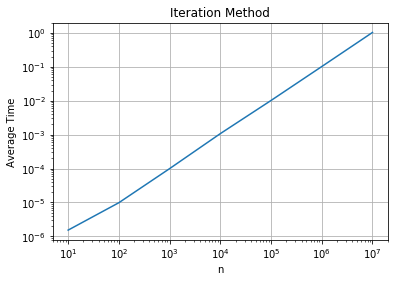

In [21]:
plt.title('Iteration Method')
plt.xlabel("n")
plt.ylabel("Average Time")
plt.grid(True)

plt.loglog(x,result_iter)

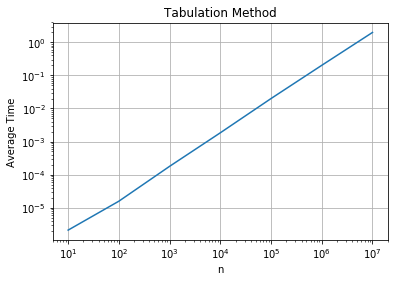

In [22]:
plt.title('Tabulation Method')
plt.xlabel("n")
plt.ylabel("Average Time")
plt.grid(True)
plt.loglog(x,result_tab)

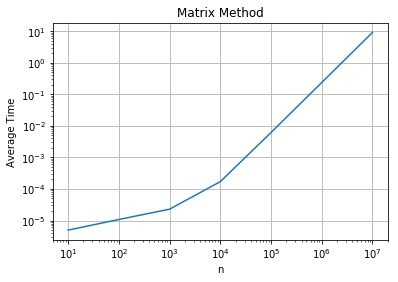

In [23]:
plt.title('Matrix Method')
plt.xlabel("n")
plt.ylabel("Average Time")
plt.grid(True)

plt.loglog(x,result_mat)

In [26]:
#write 2 functions that return 2 outputs each for both forms of the quadratic equation
#investigate catestrophic cancellation, and examine the errors and relative errors
#what are the most precise solutions? ie least relative error?

In [16]:
np.set_printoptions(precision=31)
def quad1(a,b,c):
    xp = (-b + np.sqrt(b**2-4*a*c))/(2*a)
    xm = (-b - np.sqrt(b**2-4*a*c))/(2*a)
    return (xp,xm)

def quad2(a,b,c):
    xp = -(2*c)/(b + np.sqrt(b**2-4*a*c))
    xm = -(2*c)/(b - np.sqrt(b**2-4*a*c))
    return (xp,xm)


Actual results should approach 0 for the positive solution and -1 for the negative solution 

First method should be more accurate for the negative solution since there are no cancellations
Second method should be more accurate for the positive solution since there are no cancellations

In [17]:
a = 1
b = 1
for i in range(1,20):
    xp = quad1(a,b,10**(-i))[0]
    xm = quad1(a,b,10**(-i))[1]
    print("First Method Solutions {0:5d}: \n {1:.31e}  {2:.31e} ".format(i,xp,xm))
    
    xp = quad2(a,b,10**(-i))[0]
    xm = quad2(a,b,10**(-i))[1]
    print("Second Method Solutions  {0:5d}: \n {1:.31e}  {2:.31e} ".format(i,xp,xm))
    print("\n")

First Method Solutions     1: 
 -1.1270166537925829786104259255808e-01  -8.8729833462074170213895740744192e-01 
Second Method Solutions      1: 
 -1.1270166537925831173883040037254e-01  -8.8729833462074181316125986995758e-01 


First Method Solutions     2: 
 -1.0102051443364401528413054620614e-02  -9.8989794855663559847158694537939e-01 
Second Method Solutions      2: 
 -1.0102051443364380711731342898929e-02  -9.8989794855663360007014262009761e-01 


First Method Solutions     3: 
 -1.0010020050140178149433722865069e-03  -9.9899899799498603769620785897132e-01 
Second Method Solutions      3: 
 -1.0010020050140421010720359618063e-03  -9.9899899799501024055814468738390e-01 


First Method Solutions     4: 
 -1.0001000200049459110118732496630e-04  -9.9989998999799944989774758141721e-01 
Second Method Solutions      4: 
 -1.0001000200050014763732131317653e-04  -9.9989998999805507207128130175988e-01 


First Method Solutions     5: 
 -1.0000100002016676370431014220230e-05  -9.9998999989999

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: RuntimeWarning: divide by zero encountered in double_scalars


Of course